In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from mlxtend.plotting import plot_decision_regions

In [2]:
hf=pd.read_csv("D:/ALL DATASET/all new datasets/heart failure/train.csv")

In [ ]:
### overview of the data

In [3]:
hf.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
## Age: The age of the patient
Anaemia: The presence of Anaemia. 1 if present, 0 if absent
creatinine_phosphokinase: The level of creatinine phosphokinase of the patient
ejection_fraction: Measurement of the heart's ejection fraction
High_blood_pressure: The presence of Anaemia. 1 if present, 0 if absent
platelets: Platelet count of the patient
serum_creatinine: level of creatinine in the blood
serum_sodium: level of sodium in the blood
sex: Male or Female
smoking: If the patient is a smoker. 1 if yes, 0 if no.
Death event: The target variable, 1 if it resulted in death, 0 if there was no death.

In [6]:
hf.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
hf.shape

(299, 13)

In [8]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
hf["platelets"].value_counts()

263358.03    25
271000.00     4
221000.00     4
255000.00     4
228000.00     4
             ..
330000.00     1
217000.00     1
268000.00     1
358000.00     1
448000.00     1
Name: platelets, Length: 176, dtype: int64

In [10]:
hf["serum_creatinine"].value_counts()

1.00    50
0.90    32
1.10    32
1.20    24
0.80    24
1.30    20
0.70    19
1.18    11
1.40     9
1.70     9
1.83     8
1.60     6
1.90     5
1.50     5
2.10     5
1.80     4
0.60     4
2.30     3
2.70     3
2.50     3
3.50     2
3.00     2
2.40     2
0.50     1
2.00     1
0.75     1
9.00     1
4.00     1
5.00     1
3.20     1
3.70     1
2.90     1
9.40     1
2.20     1
6.10     1
3.80     1
5.80     1
6.80     1
4.40     1
3.40     1
Name: serum_creatinine, dtype: int64

In [ ]:
### missing value identification and imputation

In [5]:
total_missing_value=hf.isnull().sum()

In [6]:
total_missing_value
## thiere is no any missing value present in the dataset

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
### visualization

In [13]:
hf.head(n=2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1


0    67.892977
1    32.107023
Name: DEATH_EVENT, dtype: float64

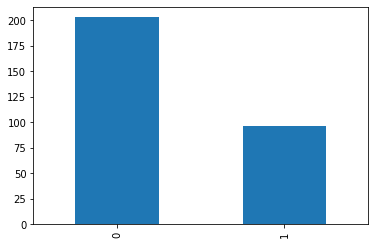

In [7]:
hf["DEATH_EVENT"].value_counts().sort_index().plot.bar()
hf.DEATH_EVENT.value_counts(normalize=True)*100
## 1 - death
## 0 - no death

In [ ]:
## From kaggel notebook

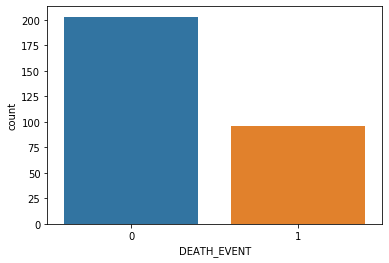

In [16]:
sns.countplot(x="DEATH_EVENT",data=hf)

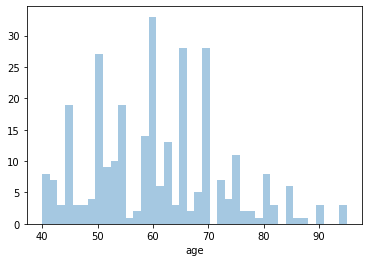

In [17]:
sns.distplot(hf["age"],bins=40,kde=False)

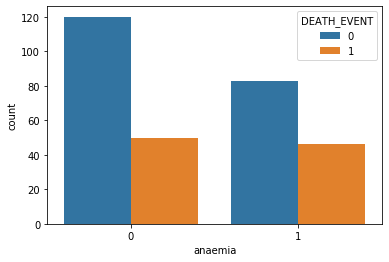

In [18]:
sns.countplot(x="anaemia",hue="DEATH_EVENT",data=hf)

## for those who dont have anaemia thiere percentage results of death is very less compared to those who have anaemia people.

In [19]:
hf.head(n=3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


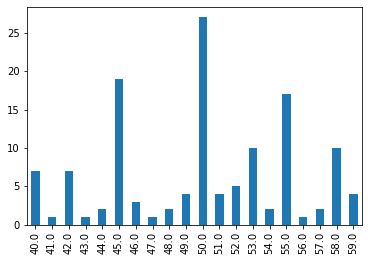

In [21]:
hf["age"].value_counts().sort_index().head(20).plot.bar()

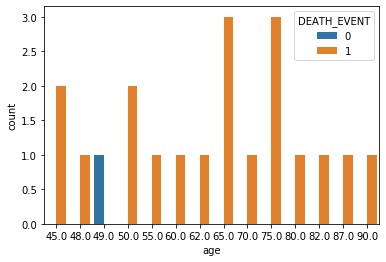

In [24]:
sns.countplot(x="age",hue="DEATH_EVENT",data=hf.head(20))
## Most of the age people are died except 49 year old people.

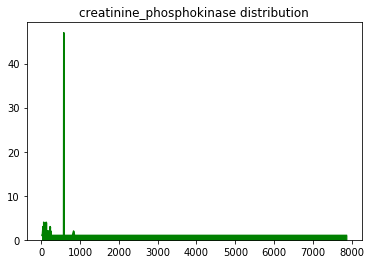

In [28]:
hf["creatinine_phosphokinase"].value_counts().sort_index().plot.area(color="green",
                                                                    title="creatinine_phosphokinase distribution",
                                                                    fontsize=10)

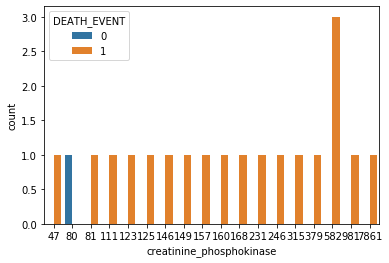

In [31]:
sns.countplot(x="creatinine_phosphokinase",hue="DEATH_EVENT",data=hf.head(20))
## those who are died thiere creatinine_phosphokinase is linear same for so many peoples.
## those are non died thiere creatinine_phosphokinase rate is 80

In [32]:
hf.head(n=3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


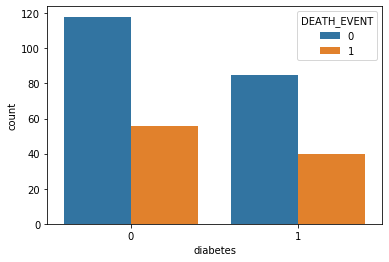

In [33]:
sns.countplot(x="diabetes",hue="DEATH_EVENT",data=hf)
## those who dont have diabetes thiere percentage of death is very less

35    0.163880
38    0.133779
40    0.123746
25    0.120401
30    0.113712
60    0.103679
50    0.070234
45    0.066890
20    0.060201
55    0.010033
15    0.006689
62    0.006689
17    0.006689
80    0.003344
70    0.003344
65    0.003344
14    0.003344
Name: ejection_fraction, dtype: float64

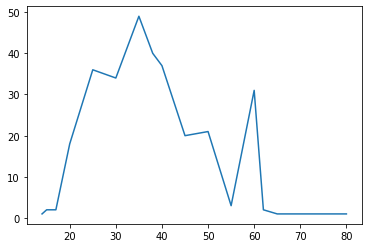

In [35]:
hf["ejection_fraction"].value_counts().sort_index().plot.line()
hf.ejection_fraction.value_counts(normalize=True)

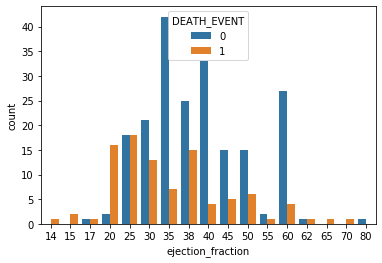

In [36]:
sns.countplot(x="ejection_fraction",hue="DEATH_EVENT",data=hf)
## those who are having ejection_fraction in the range of 35 to 40 thiere percenatge of die is less

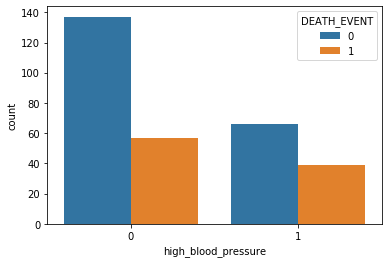

In [37]:
sns.countplot(x="high_blood_pressure",hue="DEATH_EVENT",data=hf)
## those who dont have high_blood_pressure thiere percnatge of die si very less

In [3]:
hf.head(n=3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


count       299.000000
mean     263358.029264
std       97804.236869
min       25100.000000
25%      212500.000000
50%      262000.000000
75%      303500.000000
max      850000.000000
Name: platelets, dtype: float64

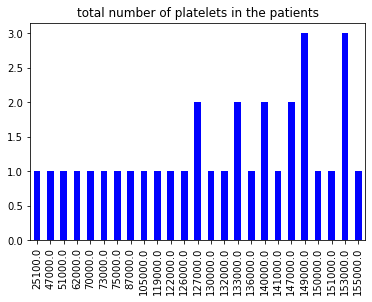

In [6]:
hf["platelets"].value_counts().sort_index().head(25).plot.bar(color="blue",
                                                    title="total number of platelets in the patients")
hf["platelets"].describe()

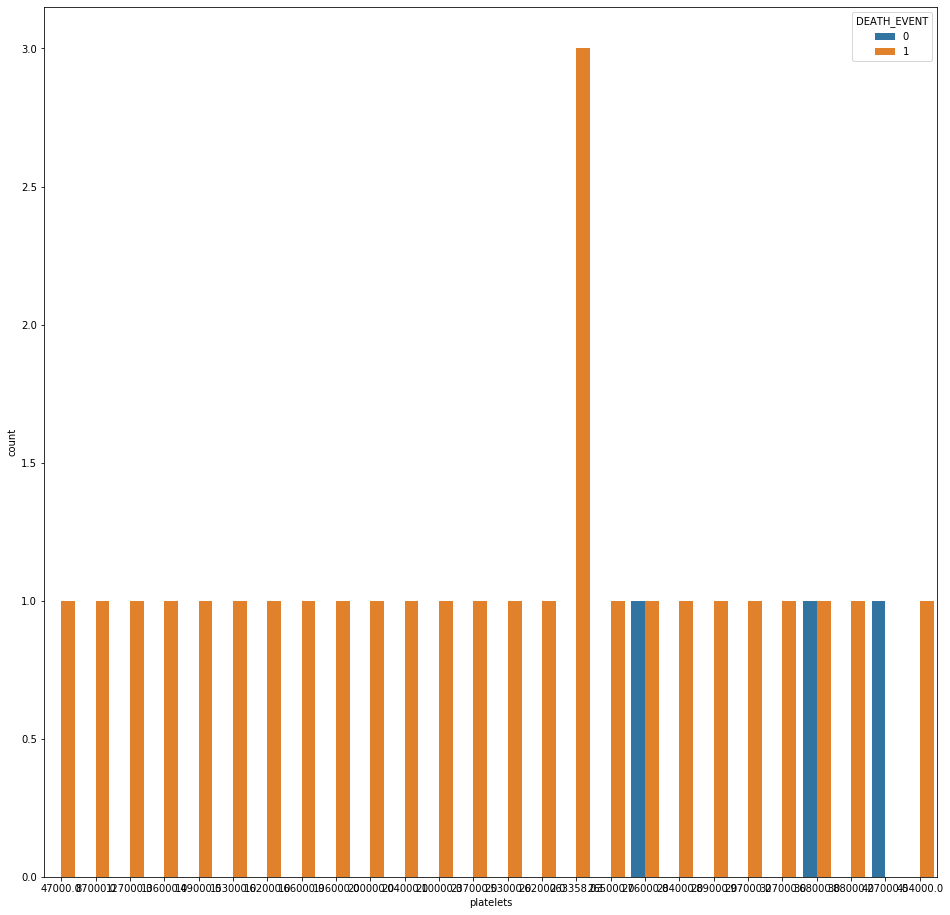

In [15]:
plt.figure(figsize=(16,16))
sns.countplot(x="platelets",hue="DEATH_EVENT",data=hf.head(30))
## those who died thiere platelets range range is very less

count    299.00000
mean       1.39388
std        1.03451
min        0.50000
25%        0.90000
50%        1.10000
75%        1.40000
max        9.40000
Name: serum_creatinine, dtype: float64

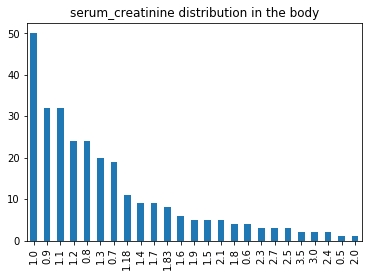

In [23]:
hf["serum_creatinine"].value_counts().head(25).plot.bar(fill="green",
                                                            title="serum_creatinine distribution in the body")
hf["serum_creatinine"].describe()

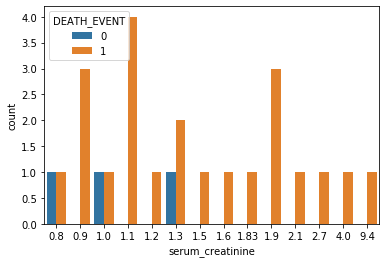

In [25]:
sns.countplot(x="serum_creatinine",hue="DEATH_EVENT",data=hf.head(25))

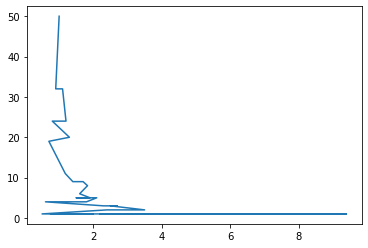

In [26]:
hf["serum_creatinine"].value_counts().plot.line()

In [27]:
hf.head(n=4)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1


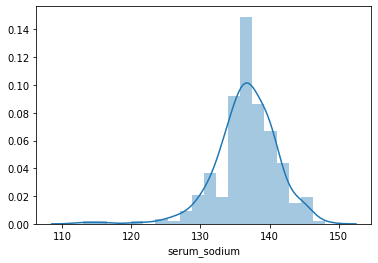

In [31]:
sns.distplot(hf["serum_sodium"],bins=20,kde=True)
### maximum distribution of serum_sodium is in the range of 120to 150

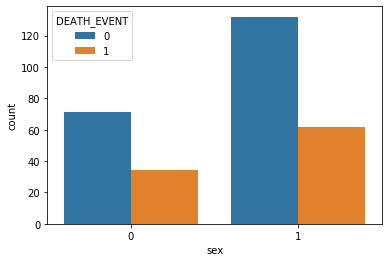

In [32]:
sns.countplot(x="sex",hue="DEATH_EVENT",data=hf)
## The percentage of male peoples are less died comapred to the female peoples

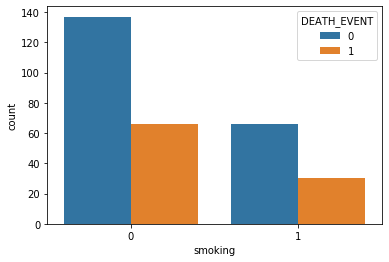

In [33]:
sns.countplot(x="smoking",hue="DEATH_EVENT",data=hf)
## those who are non smokers they are survived more

count    299.000000
mean     130.260870
std       77.614208
min        4.000000
25%       73.000000
50%      115.000000
75%      203.000000
max      285.000000
Name: time, dtype: float64

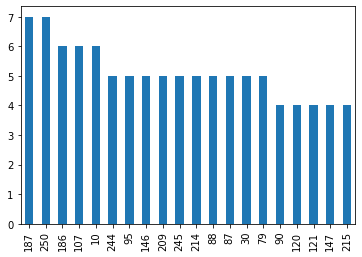

In [36]:
hf["time"].value_counts().head(20).plot.bar()
hf["time"].describe()

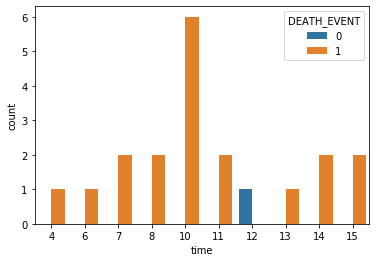

In [38]:
sns.countplot(x="time",hue="DEATH_EVENT",data=hf.head(20))
##more the time duration more the chnaces of die

In [39]:
hf.head(n=3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


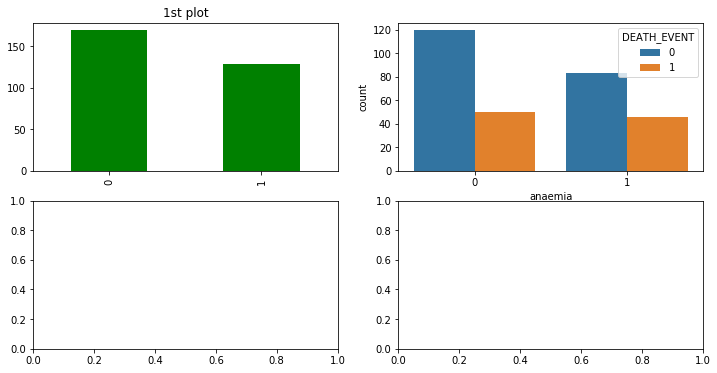

In [45]:
fig,axarr=plt.subplots(2,2,figsize=(12,6))
hf["anaemia"].value_counts().sort_index().head(10).plot.bar(ax=axarr[0,0],color="green",title="1st plot")
sns.countplot(x="anaemia",hue="DEATH_EVENT",data=hf,ax=axarr[0,1])


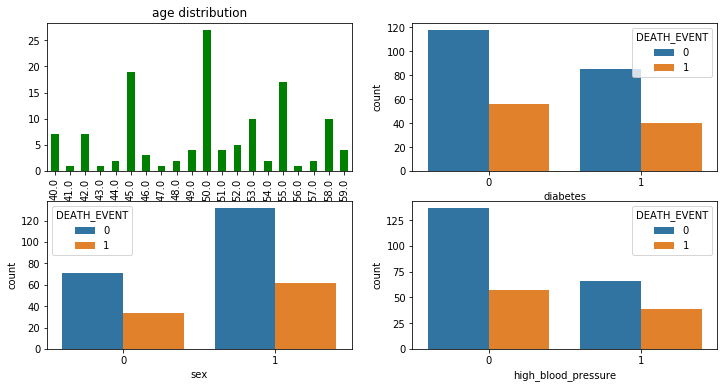

In [54]:
fig,axarr=plt.subplots(2,2,figsize=(12,6))
hf["age"].value_counts().sort_index().head(20).plot.bar(ax=axarr[0,0],color="green",title="age distribution",fontsize=10)
sns.countplot(x="diabetes",hue="DEATH_EVENT",data=hf,ax=axarr[0,1])
sns.countplot(x="sex",hue="DEATH_EVENT",data=hf,ax=axarr[1,0])
sns.countplot(x="high_blood_pressure",hue="DEATH_EVENT",data=hf,ax=axarr[1,1])

In [60]:
num_col=hf.loc[:,("age","creatinine_phosphokinase","ejection_fraction","high_blood_pressure","platelets","serum_sodium","time")]


In [61]:
num_col.head()

,age,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_sodium,time
0,75.0,582,20,1,265000.00,130,4
1,55.0,7861,38,0,263358.03,136,6
2,65.0,146,20,0,162000.00,129,7
3,50.0,111,20,0,210000.00,137,7
4,65.0,160,20,0,327000.00,116,8


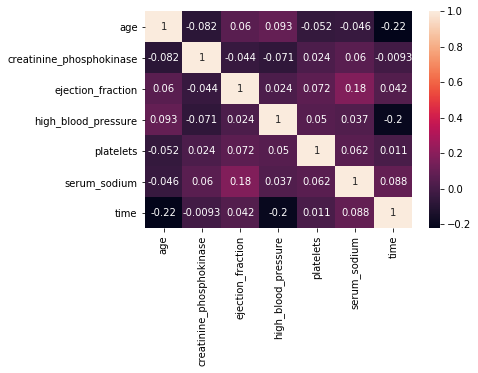

In [63]:
sns.heatmap(num_col.corr(),annot=True)
## serum_sodium is having good correlation with time

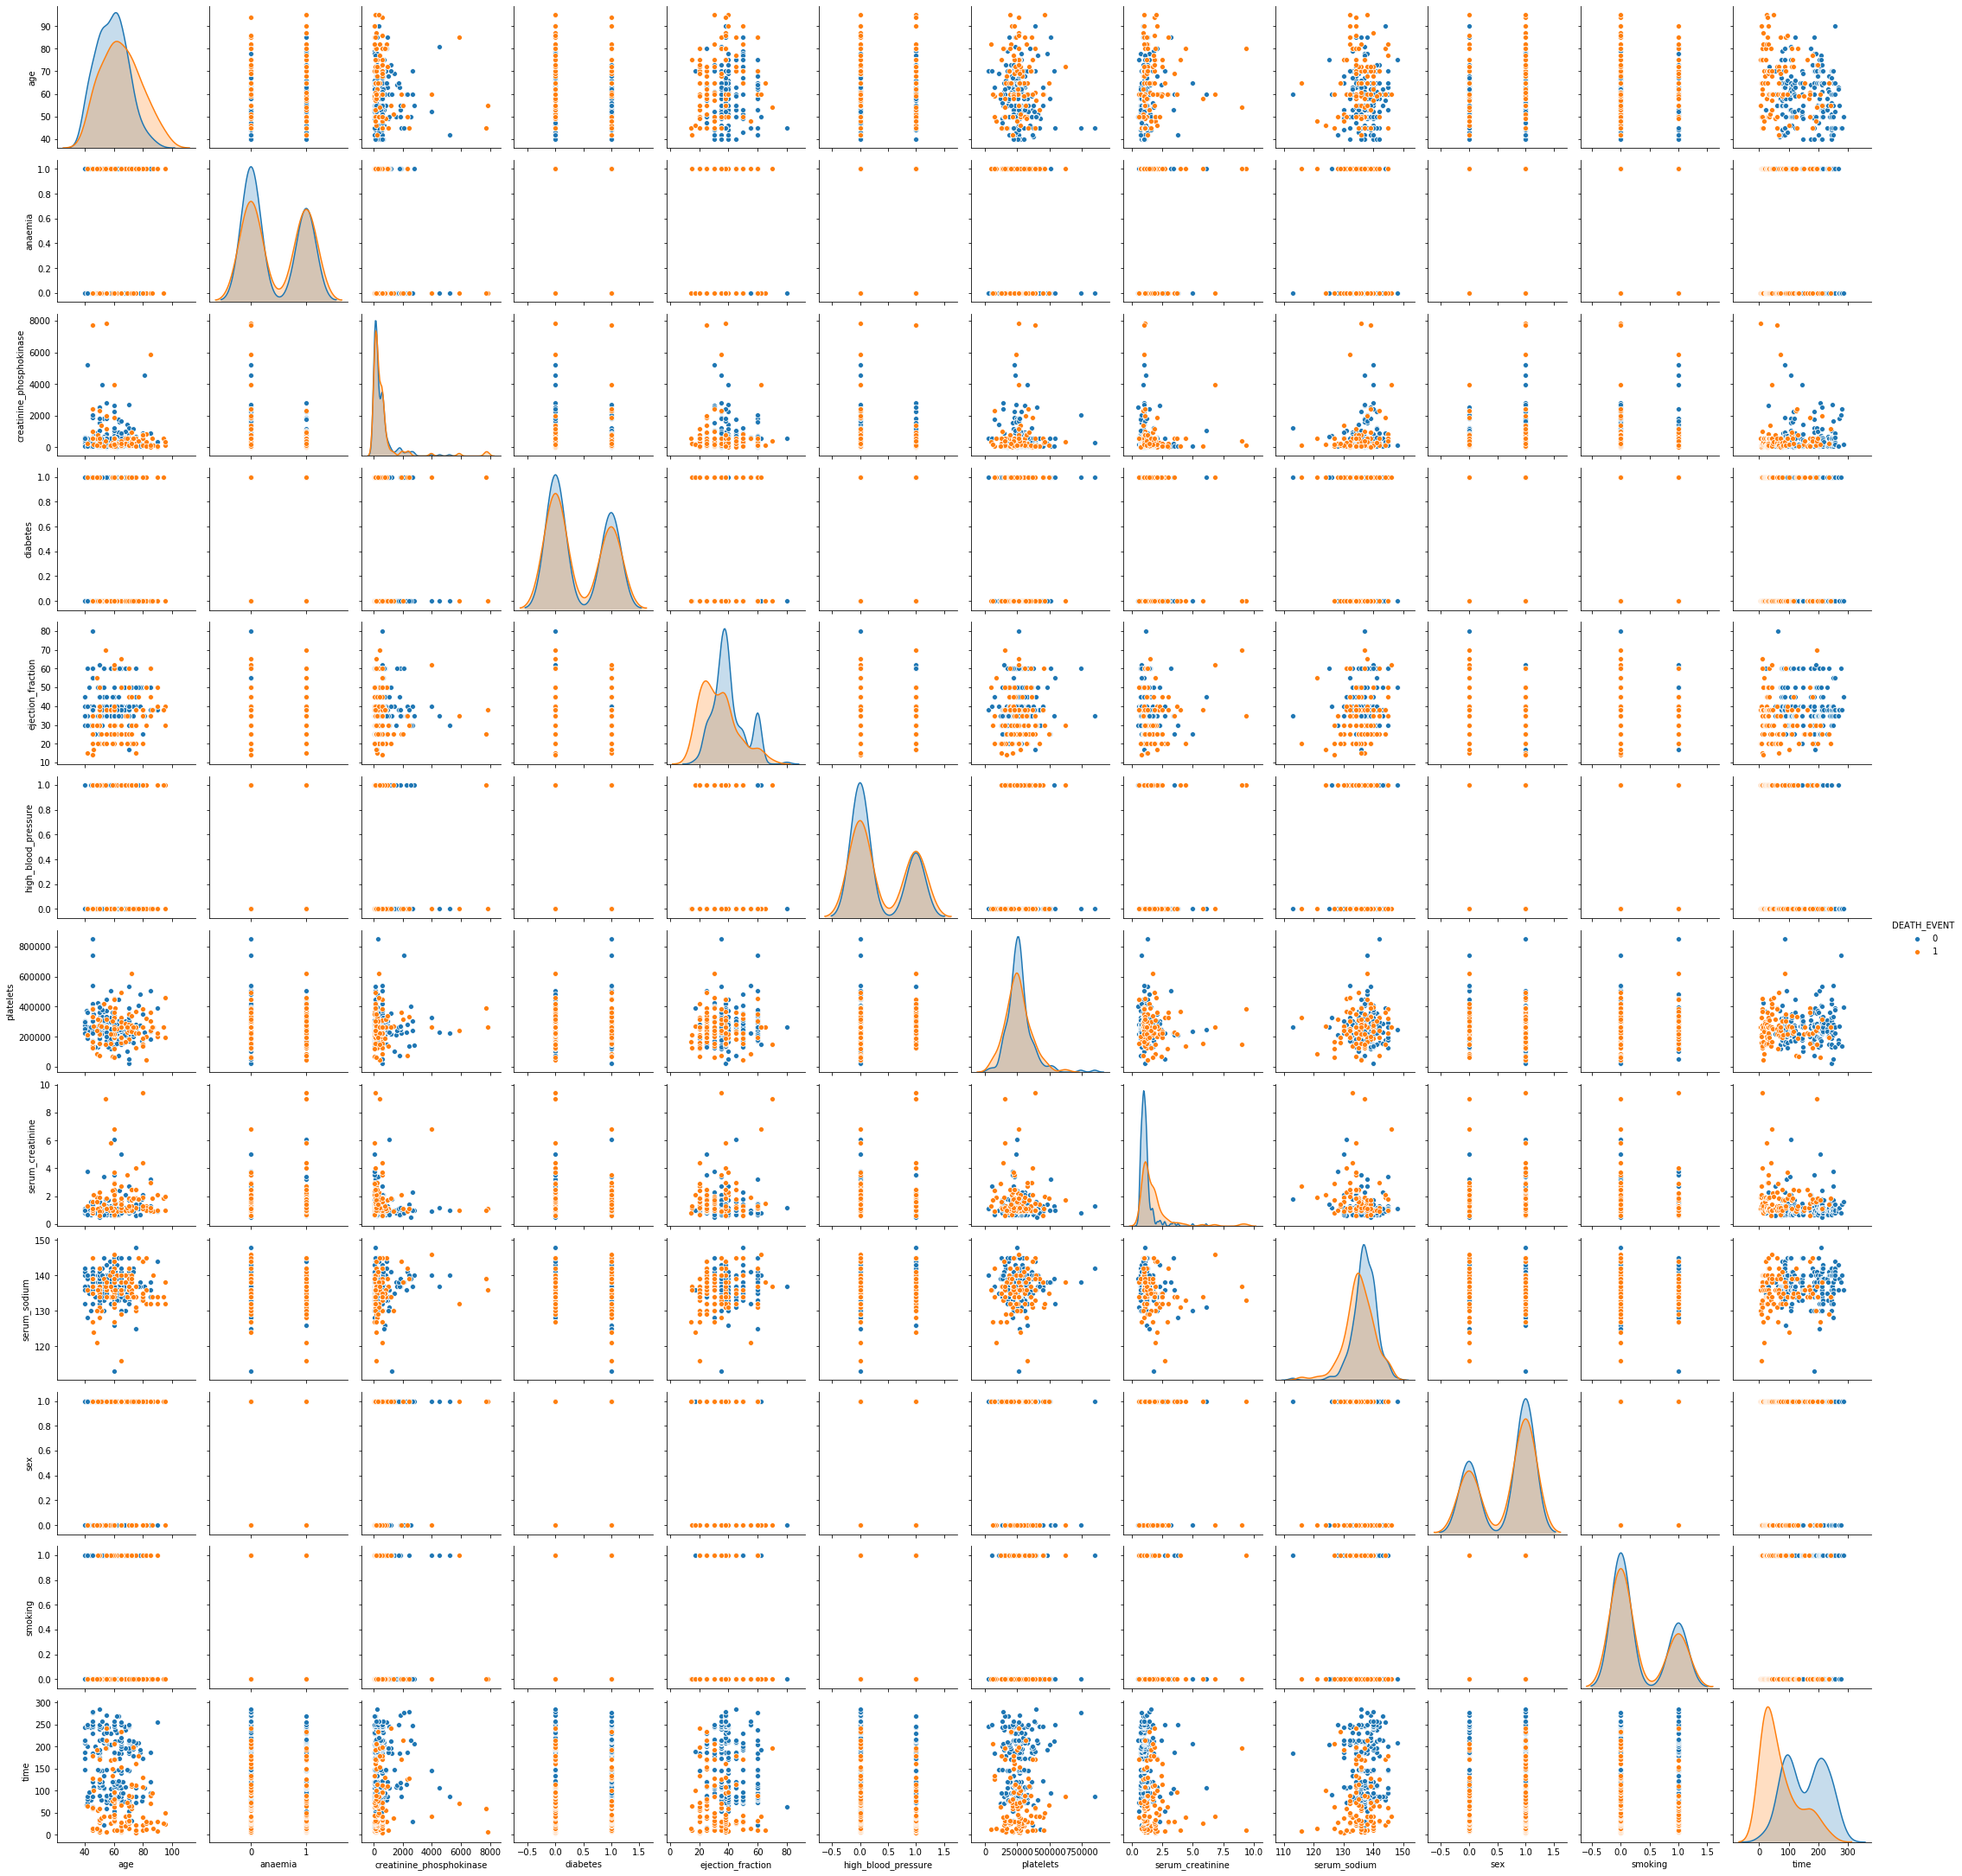

In [64]:
sns.pairplot(data=hf,hue="DEATH_EVENT")

In [70]:
hf.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


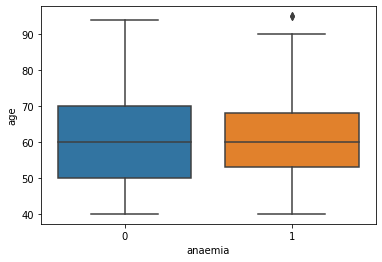

In [72]:
df=hf[hf.age.isin(hf.age.value_counts().index)]
sns.boxplot(x="anaemia",
           y="age",
           data=df)

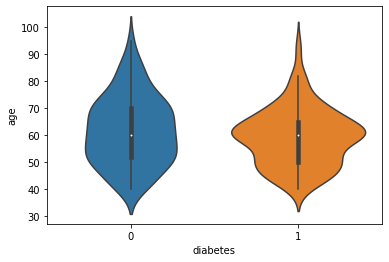

In [73]:
sns.violinplot(x="diabetes",
              y="age",
              data=df)

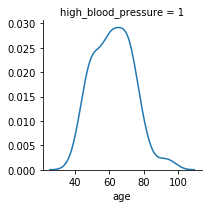

In [77]:
df_facet=hf[hf["high_blood_pressure"].isin([1])]
a=sns.FacetGrid(df_facet,col="high_blood_pressure")
a.map(sns.kdeplot,"age")

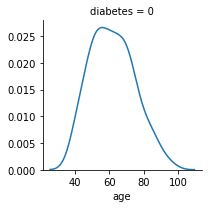

In [79]:
df2=hf[hf["diabetes"].isin([0])]
b=sns.FacetGrid(df2,col="diabetes")
b.map(sns.kdeplot,"age")

In [ ]:
### convertion of catagorical variable

In [8]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [11]:
hf["serum_creatinine"].value_counts() 

1.00    50
0.90    32
1.10    32
1.20    24
0.80    24
1.30    20
0.70    19
1.18    11
1.40     9
1.70     9
1.83     8
1.60     6
1.90     5
1.50     5
2.10     5
1.80     4
0.60     4
2.30     3
2.70     3
2.50     3
3.50     2
3.00     2
2.40     2
0.50     1
2.00     1
0.75     1
9.00     1
4.00     1
5.00     1
3.20     1
3.70     1
2.90     1
9.40     1
2.20     1
6.10     1
3.80     1
5.80     1
6.80     1
4.40     1
3.40     1
Name: serum_creatinine, dtype: int64

In [ ]:
### Scaling

In [14]:
hf.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
sc_x=StandardScaler()

In [5]:
x=pd.DataFrame(sc_x.fit_transform(hf.drop(["DEATH_EVENT"],axis=1),),
              columns=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'])

In [6]:
y=hf["DEATH_EVENT"]

In [ ]:
### spiltting into test and train

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [10]:
x_train.shape

(209, 12)

In [12]:
y_train.shape

(209,)

In [14]:
x_test.shape

(90, 12)

In [13]:
y_test.shape

(90,)

In [ ]:
### KNN MODEL BUILDING

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn=KNeighborsClassifier()

In [17]:
train_score=[]
test_score=[]

In [18]:
for i in range(1,15):
    knn=KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
train_score.append(knn.score(x_train,y_train))
test_score.append(knn.score(x_test,y_test))

In [ ]:
### k value identfication

In [34]:
max_train_score=max(train_score)
train_score_ind=[i for i,v in enumerate(train_score)if v==max_train_score]
print("max train score {} and % k={}".format(max_train_score*100,list(map(lambda x:x+1,train_score_ind))))

max train score 73.20574162679426 and % k=[1]


In [38]:
max_test_score=max(test_score)
test_score_ind=[i for i,v in enumerate(test_score)if v==max_test_score]
print("max test score {} and % k={}".format(max_test_score*100,list(map(lambda x:x+1,test_score_ind))))

max test score 74.44444444444444 and % k=[1]


In [ ]:
### passing k value knn

In [39]:
knn=KNeighborsClassifier(1)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
## predict

In [40]:
knn_pred=knn.predict(x_test)
knn.score(x_test,y_test)

0.6555555555555556

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
confusion_matrix(y_test,knn_pred)


array([[51, 11],
       [20,  8]], dtype=int64)

In [43]:
pd.crosstab(y_test,knn_pred,margins=True)

col_0,0,1,All
DEATH_EVENT,,,
0,51,11,62
1,20,8,28
All,71,19,90


In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(y_test,knn_pred)

0.6555555555555556

In [ ]:
## heatmap for confussion curve

In [46]:
from sklearn import metrics

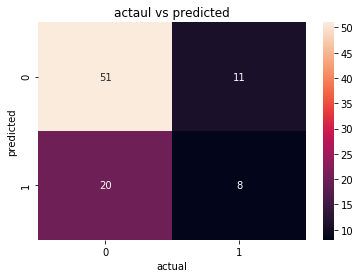

In [48]:
y_knn_cnf=metrics.confusion_matrix(y_test,knn_pred)
sns.heatmap(pd.DataFrame(y_knn_cnf),annot=True)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.title("actaul vs predicted")
plt.show()

In [ ]:
### roc curve

In [49]:
from sklearn.metrics import roc_curve

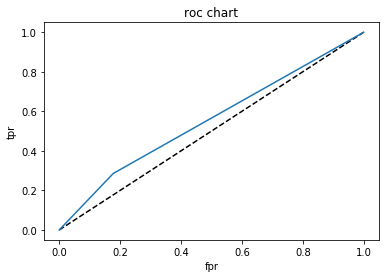

In [52]:
y_pred_prob=knn.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="knn")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("roc chart")
plt.show()

In [54]:
from sklearn.metrics import roc_auc_score

In [55]:
roc_auc_score(y_test,y_pred_prob)

0.554147465437788

In [ ]:
### decission tree model

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
tree=DecisionTreeClassifier()

In [58]:
tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
### confussion matrix

In [59]:
y_tree_pred=tree.predict(x_test)
tree.score(x_test,y_test)

0.7777777777777778

In [60]:
from sklearn.metrics import  confusion_matrix

In [61]:
confusion_matrix(y_test,y_tree_pred)

array([[52, 10],
       [10, 18]], dtype=int64)

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
pd.crosstab(y_test,y_tree_pred,margins=True)

col_0,0,1,All
DEATH_EVENT,,,
0,52,10,62
1,10,18,28
All,62,28,90


In [64]:
accuracy_score(y_test,y_tree_pred)

0.7777777777777778

In [ ]:
## heatmap

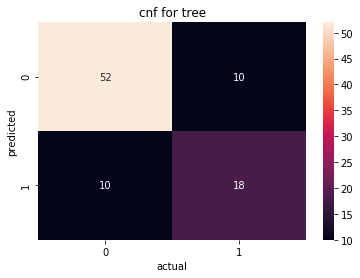

In [66]:
y_tree_cnf=metrics.confusion_matrix(y_test,y_tree_pred)
sns.heatmap(pd.DataFrame(y_tree_cnf),annot=True)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.title("cnf for tree")
plt.show()

In [ ]:
## roc curve

In [67]:
from sklearn.metrics import roc_curve

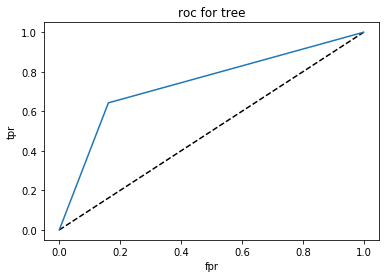

In [69]:
y_tree_prob=tree.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_tree_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="tree")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("roc for tree")
plt.show()

In [71]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_tree_prob)

0.7407834101382488

In [ ]:
### random forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf=RandomForestClassifier()

In [21]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
## prediction

In [22]:
y_predict=rf.predict(x_test)
rf.score(x_test,y_test)

0.8444444444444444

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
confusion_matrix(y_test,y_predict)

array([[58,  4],
       [10, 18]], dtype=int64)

In [25]:
pd.crosstab(y_test,y_predict,margins=True)

col_0,0,1,All
DEATH_EVENT,,,
0,58,4,62
1,10,18,28
All,68,22,90


In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test,y_predict)

0.8444444444444444

In [28]:
from sklearn import metrics

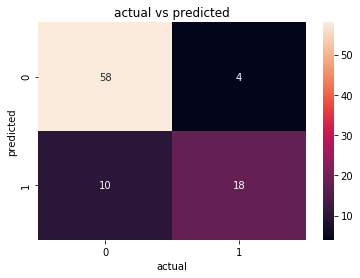

In [29]:
y_rf_hn=metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(pd.DataFrame(y_rf_hn),annot=True)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.title("actual vs predicted")
plt.show()

In [ ]:
## roc chart

In [30]:
from sklearn.metrics import roc_curve

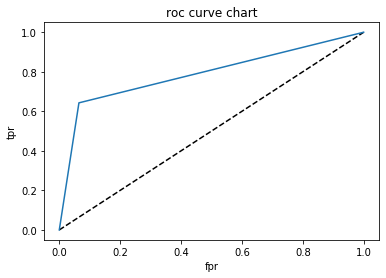

In [34]:
y_rf_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_predict)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="rf")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("roc curve chart")
plt.show()

In [36]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_rf_prob)

0.9308755760368663

In [ ]:
### logistic regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lm=LogisticRegression()
lm.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
lm_predict=lm.predict(x_test)
lm.score(x_test,y_test)

0.8111111111111111

In [ ]:
## comfussion matrix

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
confusion_matrix(y_test,lm_predict)

array([[58,  4],
       [13, 15]], dtype=int64)

In [43]:
pd.crosstab(y_test,lm_predict,margins=True)

col_0,0,1,All
DEATH_EVENT,,,
0,58,4,62
1,13,15,28
All,71,19,90


In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(y_test,lm_predict)

0.8111111111111111

In [ ]:
#### confussion matrix using heatmap

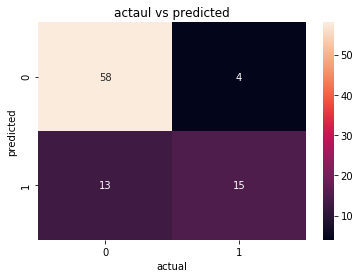

In [46]:
y_cnf_lm=metrics.confusion_matrix(y_test,lm_predict)
sns.heatmap(pd.DataFrame(y_cnf_lm),annot=True)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.title("actaul vs predicted")
plt.show()

In [ ]:
## ROC chart

In [48]:
from sklearn.metrics import roc_curve

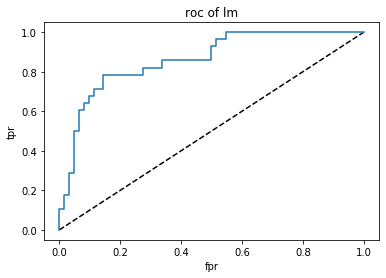

In [50]:
y_lm_prob=lm.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_lm_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="lm")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("roc of lm")
plt.show()

In [51]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_lm_prob)

0.8617511520737327

In [ ]:
###  Naybayes thearm

In [52]:
from sklearn.naive_bayes import GaussianNB

In [53]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [54]:
gnb_predict=gnb.predict(x_test)
gnb.score(x_test,y_test)

0.7555555555555555

In [ ]:
## confussion matrix

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,gnb_predict)
pd.crosstab(y_test,gnb_predict,margins=True)


col_0,0,1,All
DEATH_EVENT,,,
0,57,5,62
1,17,11,28
All,74,16,90


In [61]:
accuracy_score(y_test,gnb_predict)

0.7555555555555555

In [ ]:
##heatmap for gnb

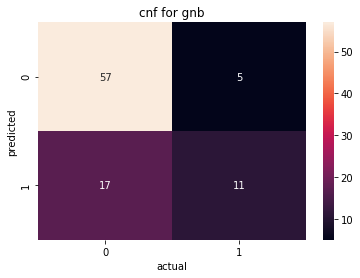

In [62]:
y_gnb_ht=metrics.confusion_matrix(y_test,gnb_predict)
sns.heatmap(pd.DataFrame(y_gnb_ht),annot=True)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.title("cnf for gnb")
plt.show()

In [ ]:
#### gnb roc curve

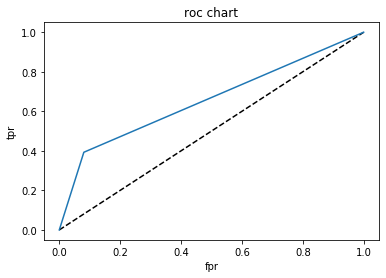

In [63]:
from sklearn.metrics import roc_curve
y_gnb_prob=gnb.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,gnb_predict)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="gnb")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("roc chart")
plt.show()

In [64]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_gnb_prob)

0.8496543778801842

In [65]:
from sklearn.metrics import classification_report
classification_report(y_test,gnb_predict)

'              precision    recall  f1-score   support\n\n           0       0.77      0.92      0.84        62\n           1       0.69      0.39      0.50        28\n\n    accuracy                           0.76        90\n   macro avg       0.73      0.66      0.67        90\nweighted avg       0.74      0.76      0.73        90\n'

In [ ]:
#### xgboost

In [66]:
import xgboost as xgb

In [68]:
xgb_model=xgb.XGBClassifier(n_estimators=100,max_depth=10,random_state=0)

In [69]:
xgb_model.fit(x_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
## predict

In [71]:
xgb_predict=xgb_model.predict(x_test)

In [72]:
xgb_model.score(x_test,y_test)

0.8555555555555555

In [73]:
confusion_matrix(y_test,xgb_predict)

array([[55,  7],
       [ 6, 22]], dtype=int64)

In [74]:
pd.crosstab(y_test,xgb_predict,margins=True)

col_0,0,1,All
DEATH_EVENT,,,
0,55,7,62
1,6,22,28
All,61,29,90


In [75]:
from sklearn.metrics import accuracy_score

In [76]:
accuracy_score(y_test,xgb_predict)

0.8555555555555555

In [ ]:
### cnf for xgb

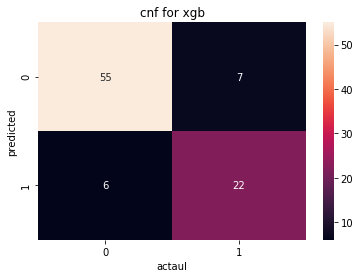

In [78]:
xgb_cnf=metrics.confusion_matrix(y_test,xgb_predict)
sns.heatmap(pd.DataFrame(xgb_cnf),annot=True)
plt.xlabel("actaul")
plt.ylabel("predicted")
plt.title("cnf for xgb")
plt.show()

In [ ]:
# roc chart for xgb

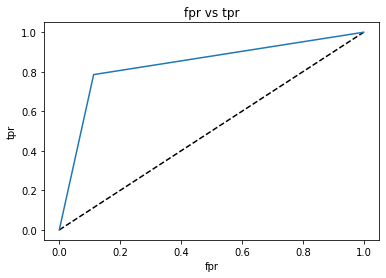

In [79]:
from sklearn.metrics import roc_curve
y_xgb_prob=xgb_model.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,xgb_predict)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="xgb")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("fpr vs tpr")
plt.show()

In [80]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_xgb_prob)

0.9135944700460829

In [81]:
classification_report(y_test,xgb_predict)

'              precision    recall  f1-score   support\n\n           0       0.90      0.89      0.89        62\n           1       0.76      0.79      0.77        28\n\n    accuracy                           0.86        90\n   macro avg       0.83      0.84      0.83        90\nweighted avg       0.86      0.86      0.86        90\n'

In [ ]:
## Accuarcy report for all the models

In [82]:
data=[[65.55,55.41,"KNN"],[77.77,74.078,"TREE"],[84.44,93.087,"RF"],[81.11,56.17,"LM"],[75.55,84.96,"GNB"],[81.55,91.35,"XGB"]]

In [85]:
Final_results=pd.DataFrame(data,columns=["accuarcy","roc score","type of algo"])

In [86]:
Final_results

,accuarcy,roc score,type of algo
0,65.55,55.410,KNN
1,77.77,74.078,TREE
2,84.44,93.087,RF
3,81.11,56.170,LM
4,75.55,84.960,GNB
5,81.55,91.350,XGB


In [ ]:
## from the above chart whta we can say is xgboost is giving better accuarcy and better roc score comapred to remianing algos
## so that what i can say xgboost is giving better model then remaining algos